In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import glob

In [2]:
import warnings
warnings.filterwarnings("ignore")
import sys
!{sys.executable} -m pip install pandas-profiling


In [3]:
def preprocess(file):  
    data = [ x.replace('\n', ' ').split(' ')[:-1] for x in file.split('name') if '\x00' not in x  ]
    data = [x if len(x)==75 else x[1:] for x in data ] #all 75 attributes besides the name!
    data = [x  for x in data if len(x) ==75] # all rows shall have 75 columns!
    data = [[ a.replace('-9.', '-9') for a in x] for x in data]
    #print (data)
    if data[-1] == [''] : 
        data =  data[:-1]
    df = pd.DataFrame([[float (a) for a in x] for x in data])
    return df 
    

def load():
    df = pd.DataFrame()
    for file in glob.glob('*.data'): 
        if 'processed' not in file:
            print (file)
            f = open(file, encoding = 'ISO-8859-1').read()
            data = preprocess(f)
            #print (data)
            df = df.append(data)
    return df
    


In [4]:
df = load()

cleveland.data
switzerland.data
long-beach-va.data


In [5]:
df = df = df.loc[:, :67]

df.head()

0    1     2    3    4    5    6    7    8      9   ...   58   59   60  \
0  1.0  0.0  63.0  1.0 -9.0 -9.0 -9.0 -9.0  1.0  145.0  ...  1.0  1.0  1.0   
1  2.0  0.0  67.0  1.0 -9.0 -9.0 -9.0 -9.0  4.0  160.0  ...  1.0  2.0  2.0   
2  3.0  0.0  67.0  1.0 -9.0 -9.0 -9.0 -9.0  4.0  120.0  ...  1.0  1.0  1.0   
3  4.0  0.0  37.0  1.0 -9.0 -9.0 -9.0 -9.0  3.0  130.0  ...  1.0  1.0  1.0   
4  6.0  0.0  41.0  0.0 -9.0 -9.0 -9.0 -9.0  2.0  130.0  ...  1.0  1.0  1.0   

    61   62   63   64   65   66   67  
0 -9.0  1.0 -9.0  1.0 -9.0  1.0  1.0  
1 -9.0  2.0 -9.0  1.0 -9.0  1.0  1.0  
2 -9.0  1.0 -9.0  1.0 -9.0  2.0  2.0  
3 -9.0  1.0 -9.0  1.0 -9.0  1.0  1.0  
4 -9.0  1.0 -9.0  1.0 -9.0  1.0  1.0  

[5 rows x 68 columns]

# We want to predict 'Beta Blocker' property (Beta blocker used during exercise ECG: 1 = yes; 0 = no). The column index is 23

The attributes we take as our data for the model are: 
    - Age (in years) index 2
    - Gender(sex) index 3
    - Cholestrol level serum cholestoral in mg/dl index 11
    - Number of years as a smoker  years index 14

In [6]:
X = pd.DataFrame({'age': df.iloc[:,2], 'Gender': df.iloc[:,3], 'Cholesterol': df.iloc[:,11],
                  'Num_years_smoke': df.iloc[:, 14], 'Beta_blocker': df.iloc[:,23]})
X.head()

age  Gender  Cholesterol  Num_years_smoke  Beta_blocker
0  63.0     1.0        233.0             20.0           0.0
1  67.0     1.0        286.0             40.0           1.0
2  67.0     1.0        229.0             35.0           1.0
3  37.0     1.0        250.0              0.0           1.0
4  41.0     0.0        204.0              0.0           0.0

In [7]:
X.isna().any()

age                False
Gender             False
Cholesterol        False
Num_years_smoke    False
Beta_blocker       False
dtype: bool

In [8]:
import pandas_profiling
X.profile_report()

In [9]:
X1 = X[X>=0].dropna()

In [10]:
import pandas_profiling
X1.profile_report()

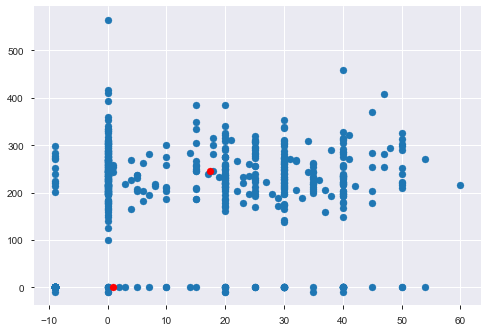

In [11]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=4).fit(X[['Num_years_smoke', 'Cholesterol']]) 
kmeans.labels_



kmeans.cluster_centers_

plt.scatter(X['Num_years_smoke'], X['Cholesterol'])
plt.scatter([ x[0] for x in kmeans.cluster_centers_], [x[1] for x in kmeans.cluster_centers_], color = 'red')
plt.show()


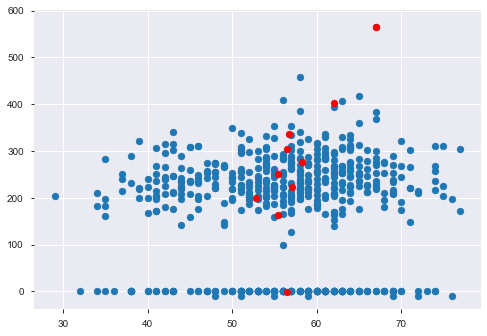

In [12]:
kmeans = KMeans(n_clusters=10, random_state=4).fit(X[['age', 'Cholesterol']]) 
kmeans.labels_



kmeans.cluster_centers_

plt.scatter(X['age'], X['Cholesterol'])
plt.scatter([ x[0] for x in kmeans.cluster_centers_], [x[1] for x in kmeans.cluster_centers_], color = 'red')
plt.show()


## Compare GMM and Kmeans for the heart dataset via the silhouette index and corresponding plots

Wikipedia definition!

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.[1]

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

In [14]:
import silhouette as si

In [15]:
si

<module 'silhouette' from '/Users/shreyakapoor/Life_Science_Informatics/WiSe19/MLinLSI/silhouette.py'>

For n_clusters = 2 The average silhouette_score is : 0.8157878908136784
For n_clusters = 3 The average silhouette_score is : 0.6554978843497342
For n_clusters = 4 The average silhouette_score is : 0.6059487667543874
For n_clusters = 5 The average silhouette_score is : 0.5991837806889051
For n_clusters = 6 The average silhouette_score is : 0.59927245912371


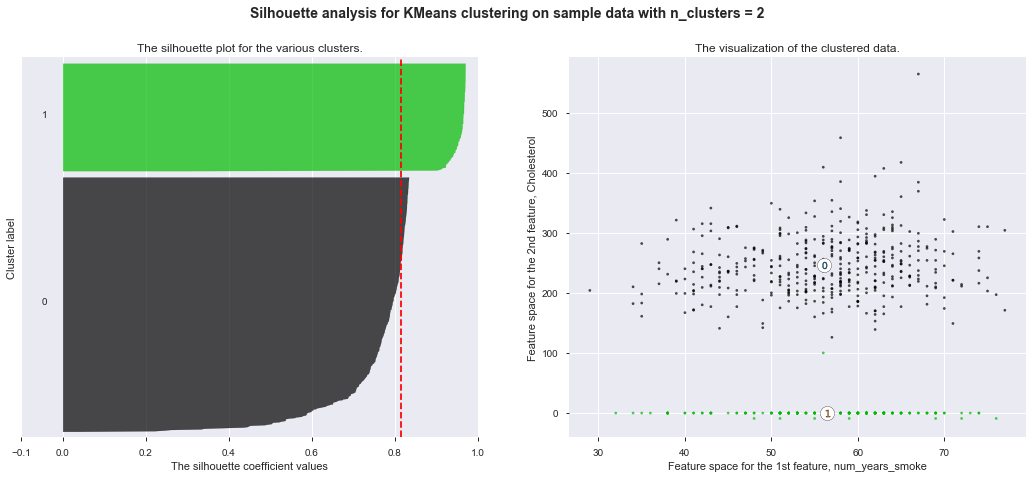

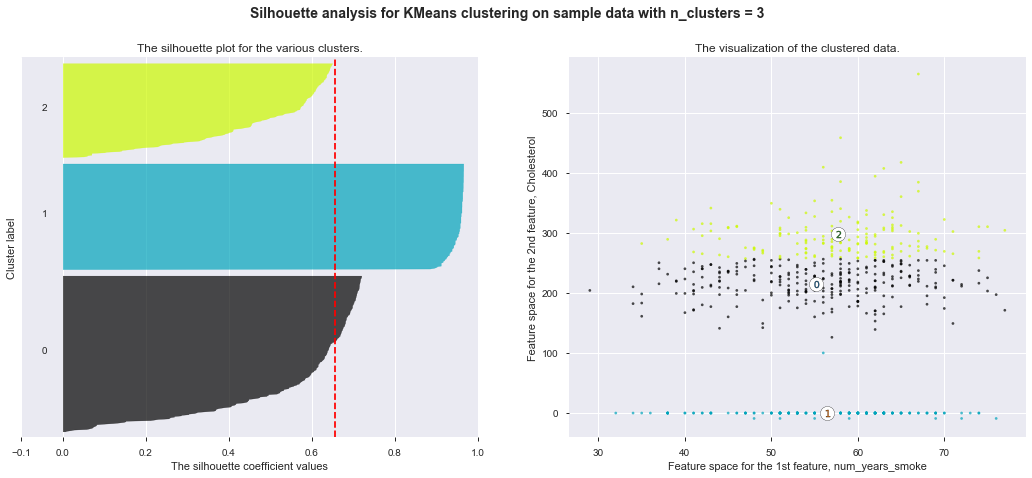

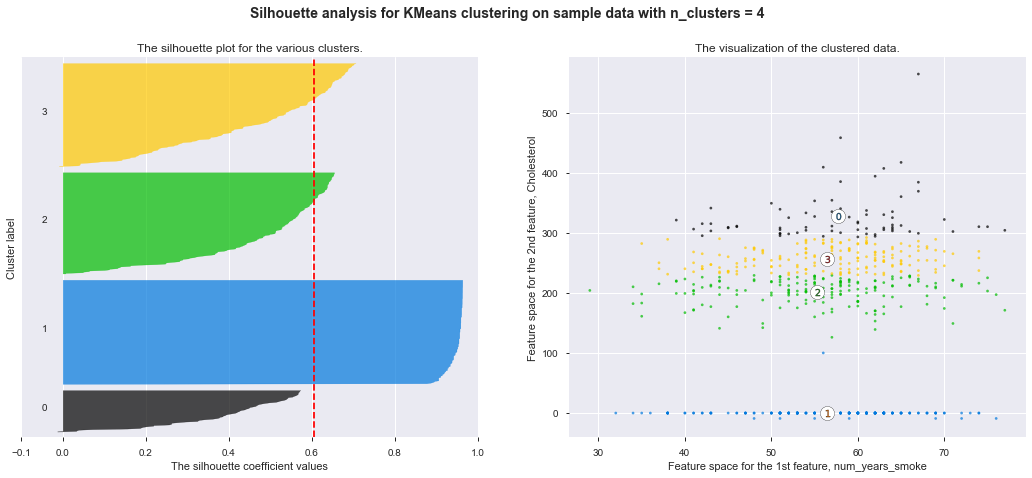

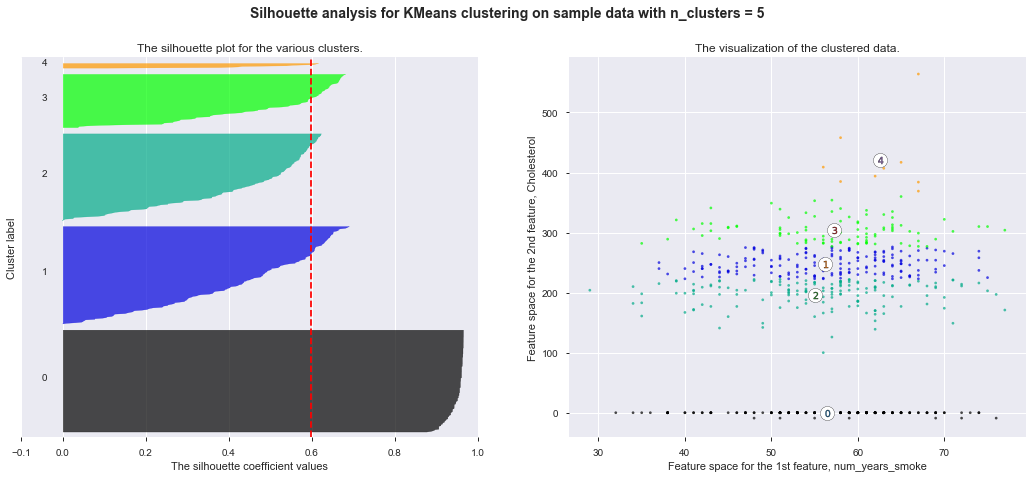

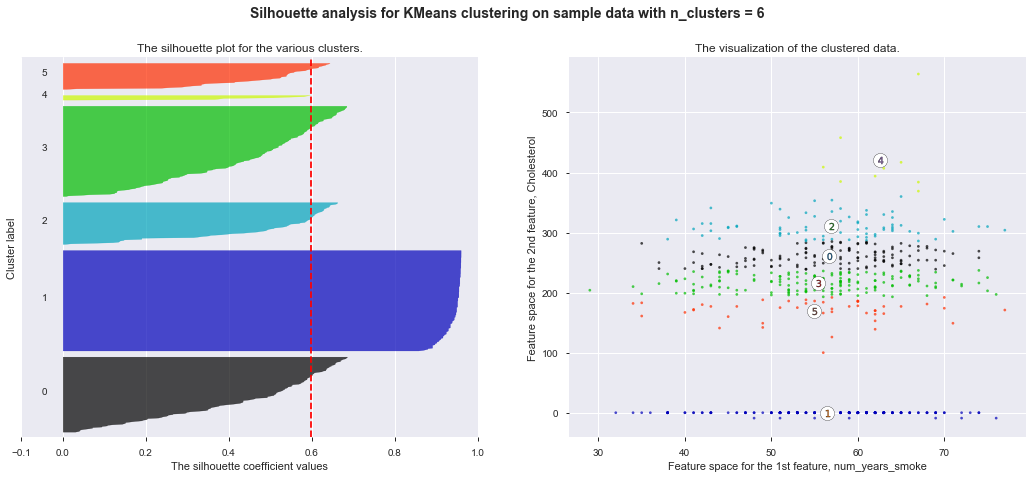

In [16]:
si.silhouette_method('k-means', X, 'age', 'Cholesterol')

For n_clusters = 2 The average silhouette_score is : 0.7842630188867392
For n_clusters = 3 The average silhouette_score is : 0.7252251716216561
For n_clusters = 4 The average silhouette_score is : 0.6027556621324689
For n_clusters = 5 The average silhouette_score is : 0.558992250339726
For n_clusters = 6 The average silhouette_score is : 0.5982884063880077


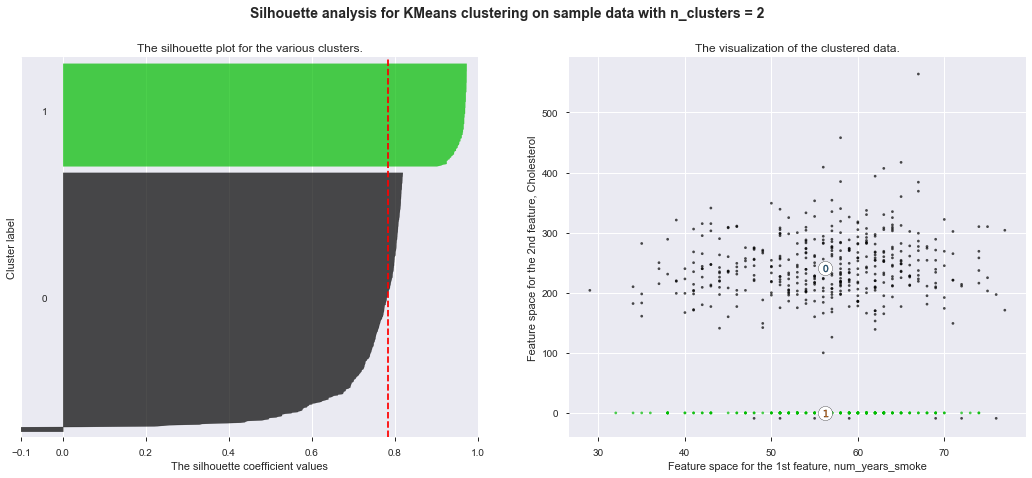

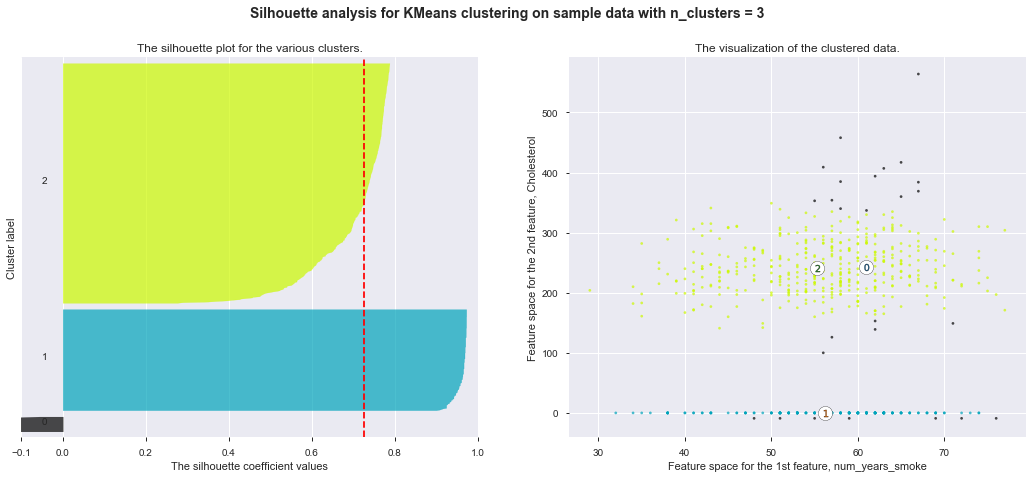

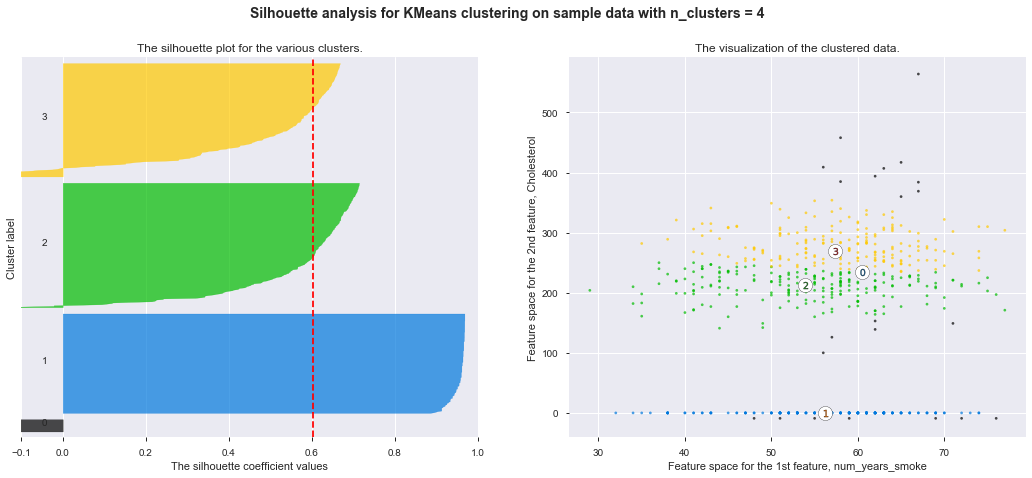

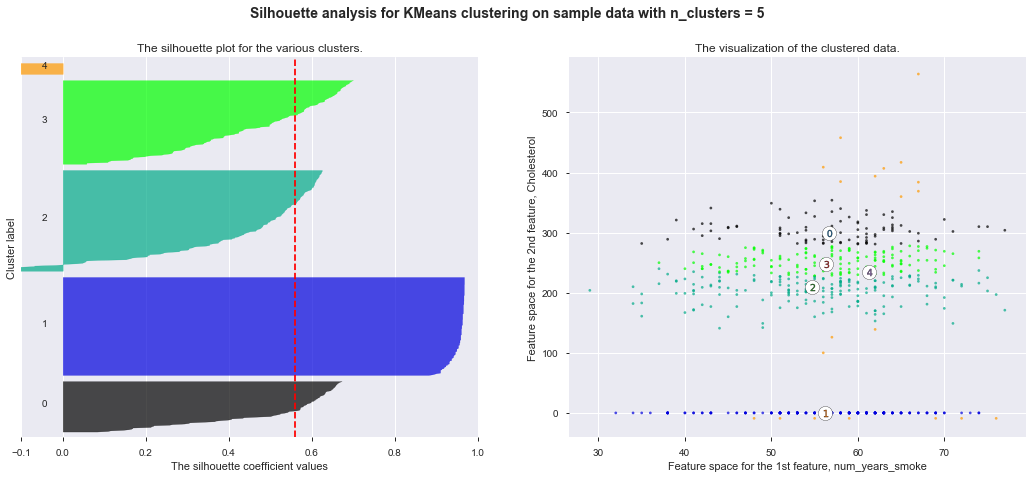

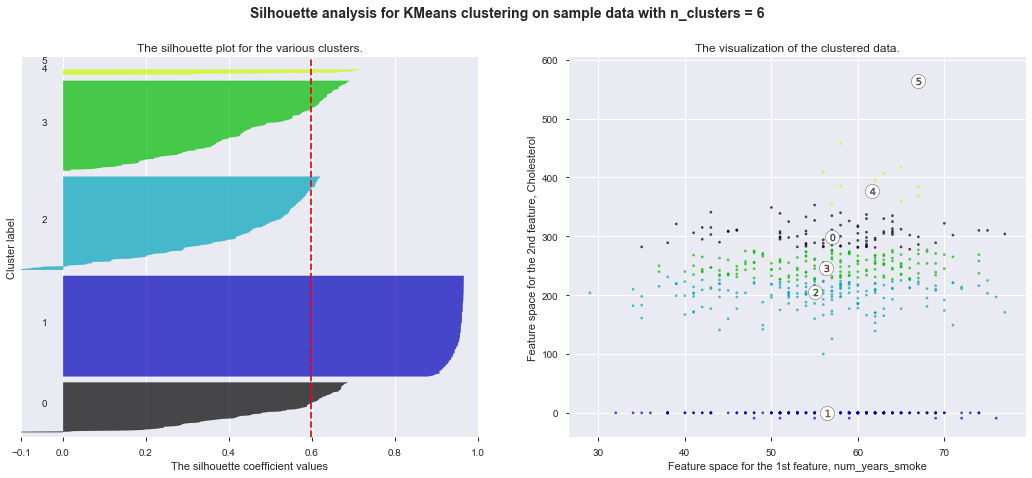

In [17]:
si.silhouette_method('GMM', X, 'age', 'Cholesterol')

The trend for the silhoutte index is similar for both KNN and GMM in this particular case of age and cholesterol!